In [37]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [49]:
pos_cash_df = pd.read_csv("D:/data_prep cuối kì/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_POS_CASH_balance.csv")
pos_cash_df

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.00,45.00,Active,0,0,185279
1,1803195,-17,48.00,31.00,Active,0,0,185279
2,1803195,-21,48.00,35.00,Active,0,0,185279
3,1803195,-8,48.00,21.00,Active,0,0,185279
4,1803195,-4,48.00,17.00,Active,0,0,185279
...,...,...,...,...,...,...,...,...
8543370,2340627,-2,NaN,NaN,Signed,0,0,284649
8543371,1011796,-2,6.00,6.00,Active,0,0,69172
8543372,1298851,-1,12.00,12.00,Active,0,0,151122
8543373,1550592,-1,1.00,0.00,Completed,0,0,56549


In [39]:
pos_cash_df.shape

(8543375, 8)

In [40]:
pos_cash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   NAME_CONTRACT_STATUS   object 
 5   SK_DPD                 int64  
 6   SK_DPD_DEF             int64  
 7   SK_ID_CURR             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 521.4+ MB


In [41]:
pos_cash_df.describe()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,SK_ID_CURR
count,8543375.00,8543375.00,8521512.00,8521497.00,8543375.00,8543375.00,8543375.00
mean,1903488.60,-34.95,17.03,10.47,11.90,0.58,153535.56
std,535938.73,26.05,12.00,11.14,134.03,30.42,88716.61
min,1000001.00,-96.00,1.00,0.00,0.00,0.00,0.00
25%,1434475.00,-54.00,10.00,3.00,0.00,0.00,76622.00
50%,1896878.00,-28.00,12.00,7.00,0.00,0.00,153315.00
75%,2369096.00,-13.00,24.00,14.00,0.00,0.00,230293.00
max,2843499.00,-1.00,84.00,84.00,4231.00,3373.00,307510.00


In [42]:
pos_cash_df.columns.str.strip()

Index(['SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF',
       'SK_ID_CURR'],
      dtype='object')

In [43]:
pos_cash_df.duplicated().sum()

0

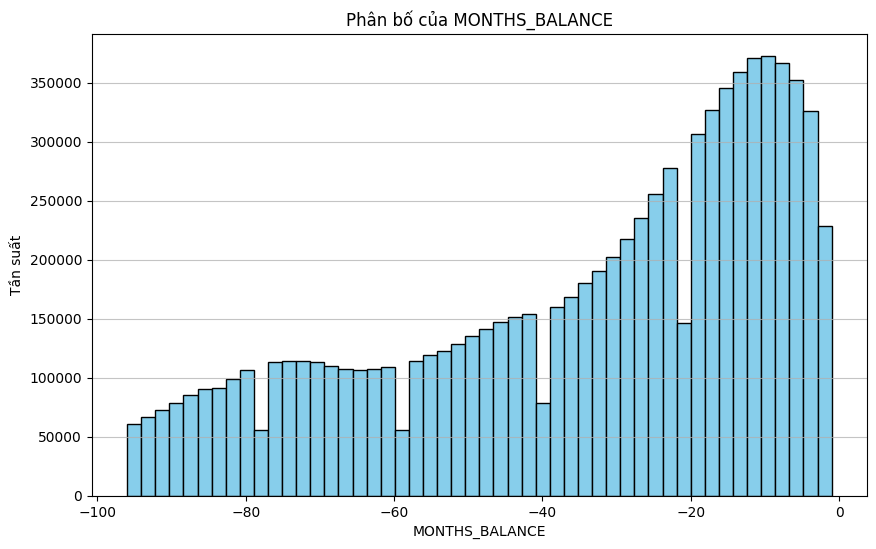

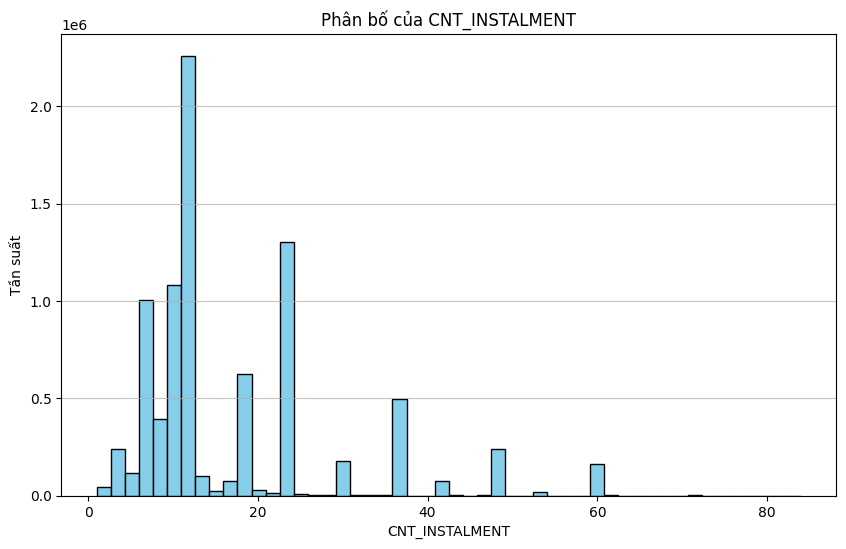

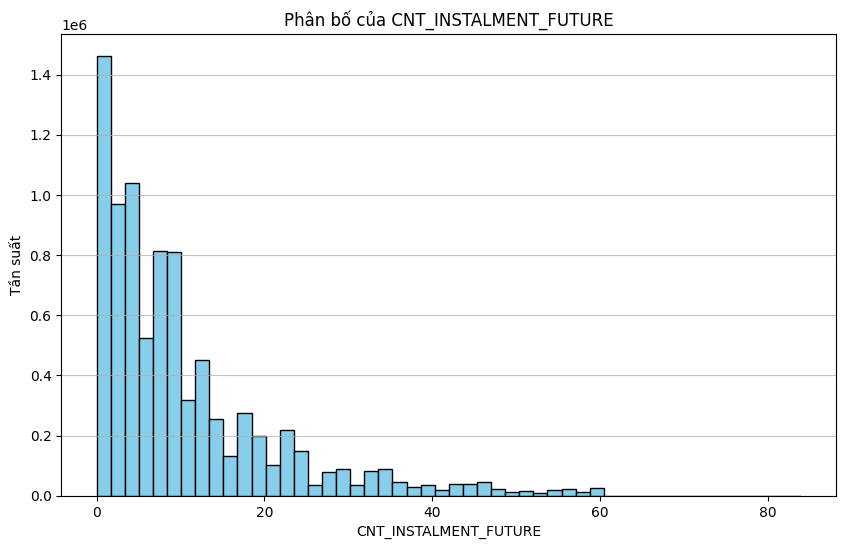

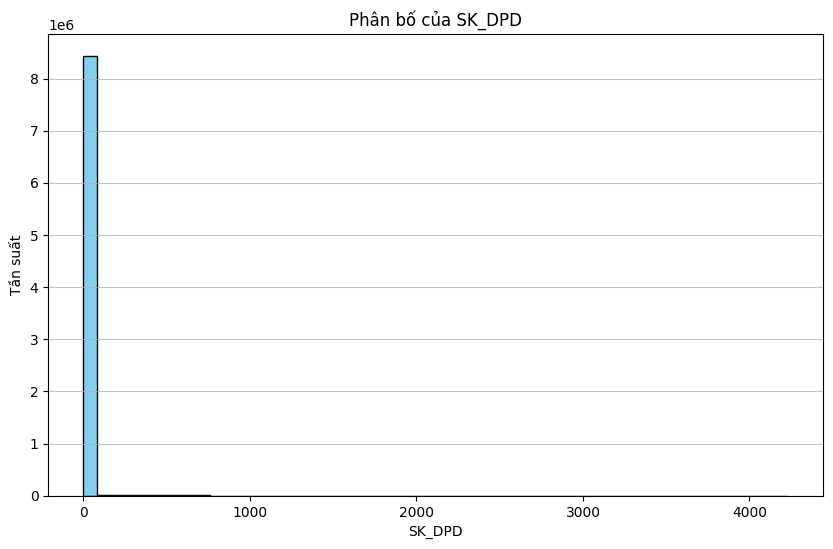

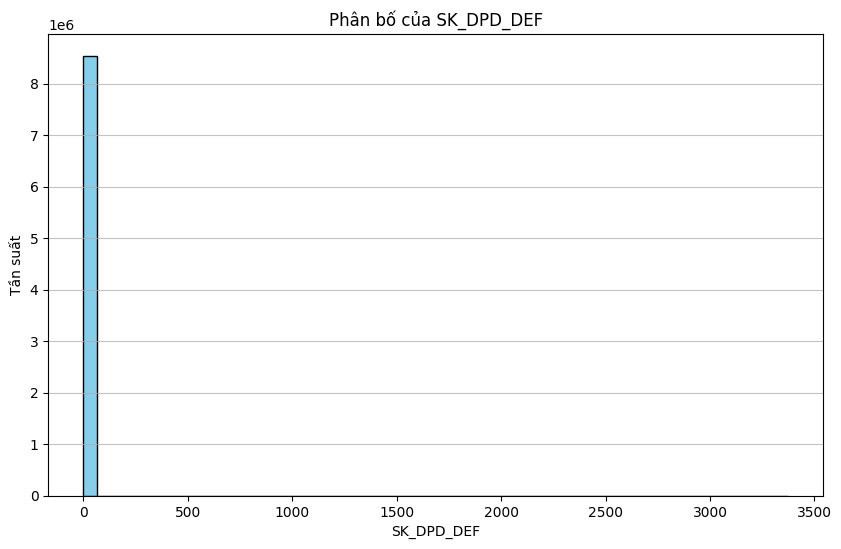

In [44]:
numeric_columns = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']
categorical_columns = ['NAME_CONTRACT_STATUS']
# Vẽ histogram cho các cột số
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(pos_cash_df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Phân bố của {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    

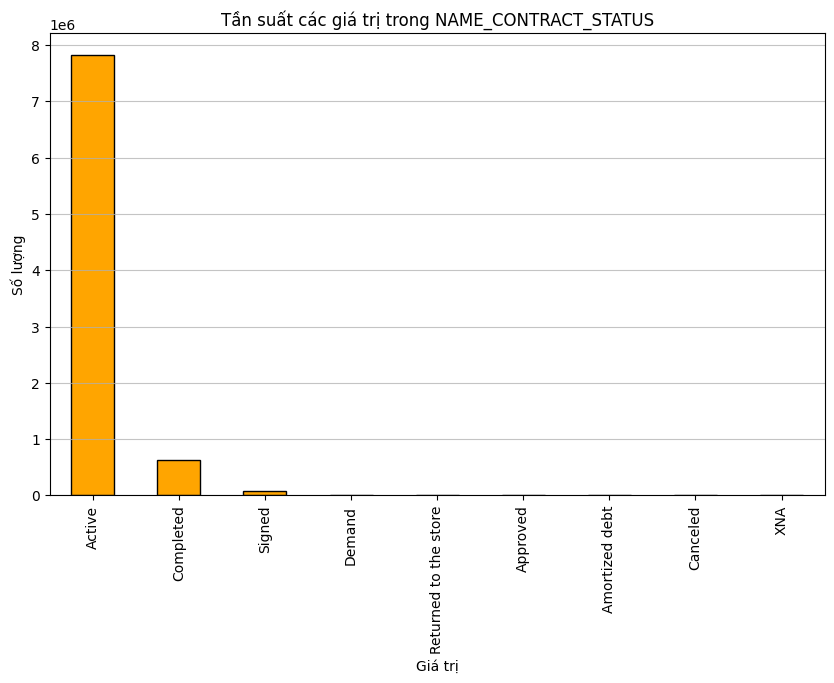

In [45]:
# Vẽ bar chart cho các cột phân loại
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    pos_cash_df[col].value_counts().plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f'Tần suất các giá trị trong {col}')
    plt.xlabel('Giá trị')
    plt.ylabel('Số lượng')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

what is 'XNA' in status ?

In [46]:
pos_cash_df[pos_cash_df['NAME_CONTRACT_STATUS'] == 'XNA']

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
1158545,1378042,-21,NaN,NaN,XNA,0,0,7185
1158707,1711630,-24,NaN,NaN,XNA,0,0,182865


In [47]:
#we remove

we see that this dataframe has no object column

In [48]:
pos_cash_df.isnull().sum()


SK_ID_PREV                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           21863
CNT_INSTALMENT_FUTURE    21878
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
SK_ID_CURR                   0
dtype: int64